In [1]:
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import IPython.display as ipd
%matplotlib inline
import librosa.display
import IPython.display as ipd
import seaborn
import urllib
import sklearn

In [2]:
wvfileDIR = 'D:/44754/Documents/Data/LJSpeech-1.1/wavs/LJ001-0008.wav'
y,sr = librosa.load(wvfileDIR, 22050) # Sample rate

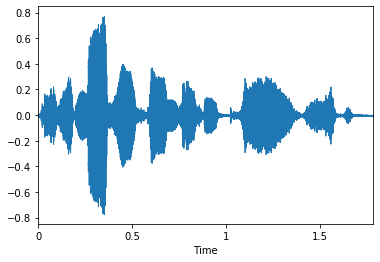

In [3]:
librosa.display.waveplot(y, sr=22050)

In [5]:
ipd.Audio(y, rate=sr)

### Mel Frequency Cepstral Coefficients (MFCCs)

The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope.

In [7]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)

(20, 77)


The very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. It only conveys a constant offset, i.e. adding a constant value to the entire spectrum. Therefore, many practitioners will discard the first MFCC when performing classification.

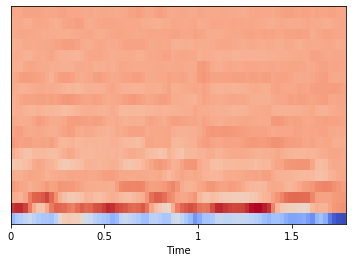

In [8]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Feature Scaling

In [9]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-4.95415229e-08  2.01262438e-08  8.51494963e-09 -4.25747482e-09
 -1.04501652e-08 -1.12242509e-08  1.54817261e-08 -7.35381978e-09
 -2.01262438e-08 -4.41229204e-08 -9.28903532e-09  1.74169412e-09
 -3.09634522e-08 -8.51494963e-09 -3.48338824e-09 -3.09634518e-09
 -1.04501652e-08 -4.16071400e-09 -1.08372085e-08 -5.03156095e-09]
[0.9999999 1.0000001 1.0000001 1.0000002 1.        1.0000001 1.
 1.0000001 0.9999999 1.0000001 0.9999994 0.9999999 0.9999996 1.0000001
 1.0000001 0.9999999 0.9999998 1.0000001 1.0000004 0.9999998]


C:\Users\44754\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\44754\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


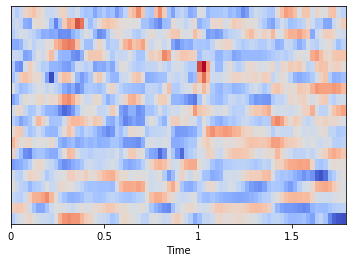

In [11]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### MFCC-gram?

In [14]:
import essentia.standard as ess
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print(mfccs.shape)

ModuleNotFoundError: No module named 'essentia'